### Author: Aman Virmani

This code produces the histogram of our statistics in our finalized algorithm to visualize the spread of values we got. It also is used to visualize the top results of our algorithm through coverage graphs and log2 change in coverage graphs.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in our statistics sorted on largest differences
df_mag = pd.read_csv('Sorted_isoform_detections.csv')

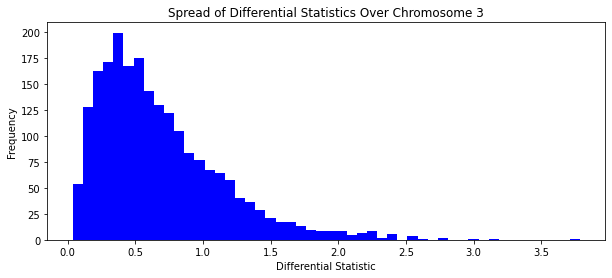

In [3]:
# Graph to visualize the distribution of our statistics
fig, ax = plt.subplots(figsize= (10,4))
graph_mag = plt.hist(df_mag['Difference'], bins=50, color = 'blue')

plt.xlabel('Differential Statistic')
plt.ylabel('Frequency')
plt.title('Spread of Differential Statistics Over Chromosome 3')

plt.show()

In [4]:
# Read in log2 change in coverage data and individual coverage files
df_full = pd.read_csv('Log2_change_in_coverage.csv')
hour2 = pd.read_csv('hour_2.csv')
hour6 = pd.read_csv('hour_6.csv')

In [11]:
# Implement slider functionality to the log2 change in coverage data for smoother graphs
df_slide = df_full.groupby(np.arange(len(df_full))//10).mean()

In [15]:
# Subsetting just the top five results from our data
df_mag_five = df_mag.iloc[:5]

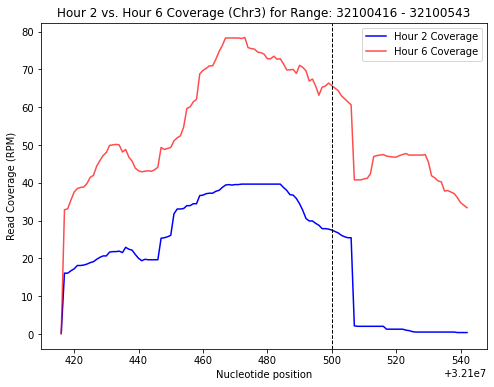

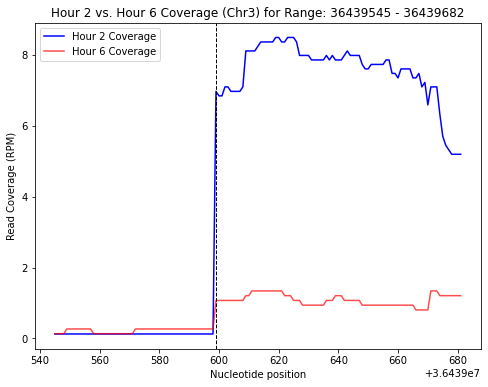

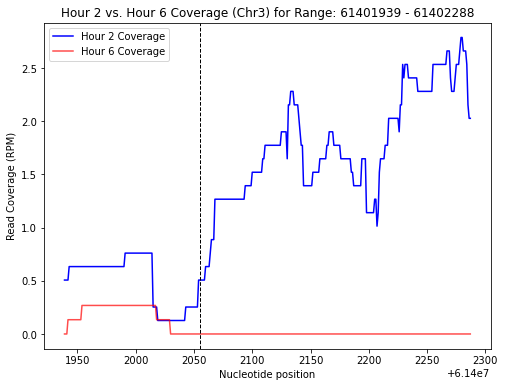

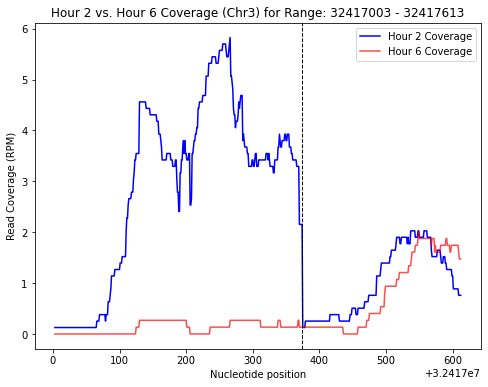

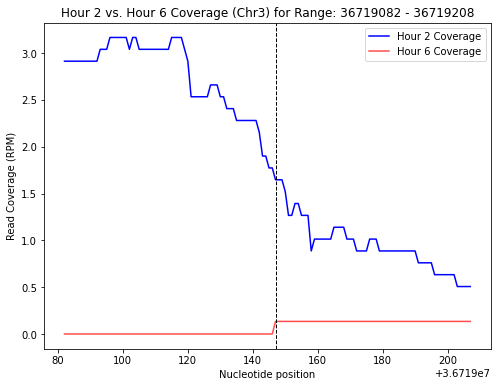

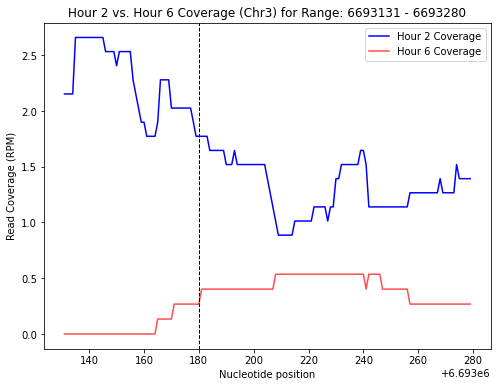

In [16]:
# For each statistic in our top 10 results, produce overlayed coverage graphs
for start,end,pos in zip(df_mag_five['Start'],df_mag_five['End'], df_mag_five['Pos']):
    start = int(start)
    end = int(end)
    fig,ax = plt.subplots(figsize=(8, 6))

    # Use hour2 and hour6 coverage files to plot
    graph2 = plt.plot(hour2['ID'].iloc[start:end], hour2['value'].iloc[start:end], color = 'blue', alpha = 1.0)

    graph6 = plt.plot(hour6['ID'].iloc[start:end], hour6['value'].iloc[start:end], color = 'red', alpha = 0.7)
    plt.legend([graph2[0],graph6[0]], ['Hour 2 Coverage', 'Hour 6 Coverage'])
    ax.ticklabel_format(style = 'plain', axis='x')
    
    # add vertical line at the position of the "step"
    plt.axvline(x=pos, color='k', linestyle='--', linewidth=1)

    plt.xlabel('Nucleotide position')
    plt.ylabel('Read Coverage (RPM)')
    plt.title(f'Hour 2 vs. Hour 6 Coverage (Chr3) for Range: {start} - {end}')
    
    plt.savefig(f"Coverage_graph_{start}_{end}.png")

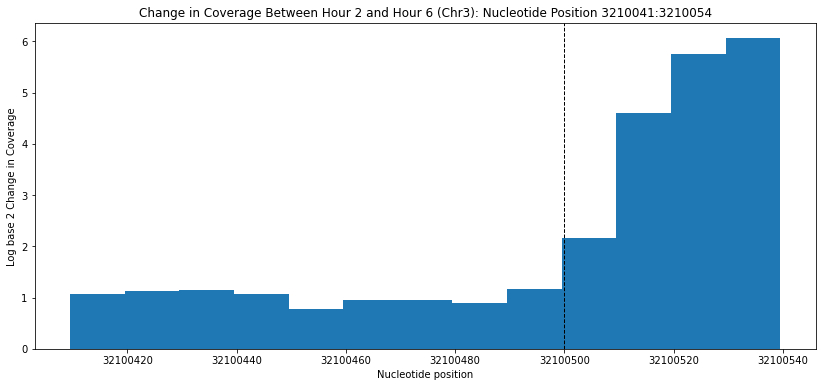

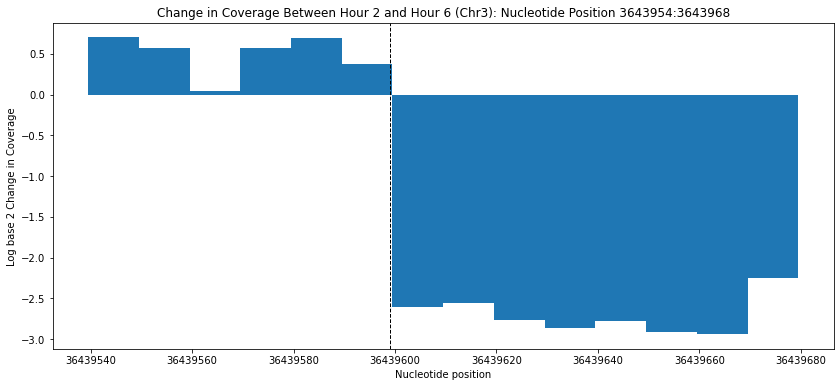

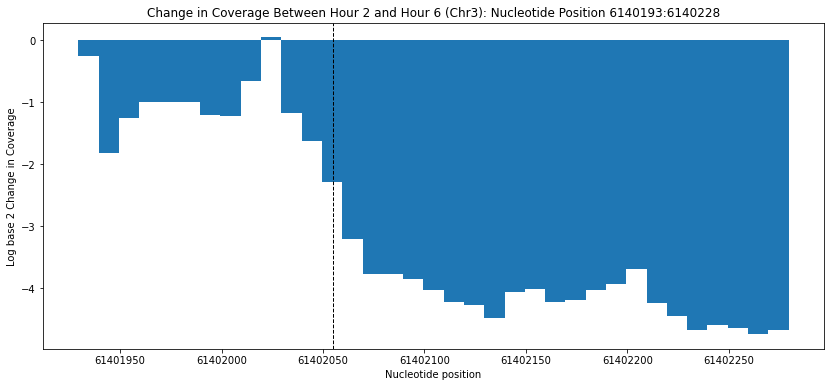

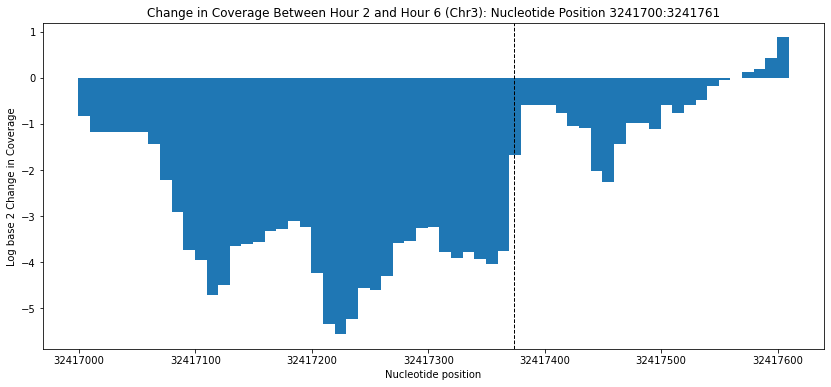

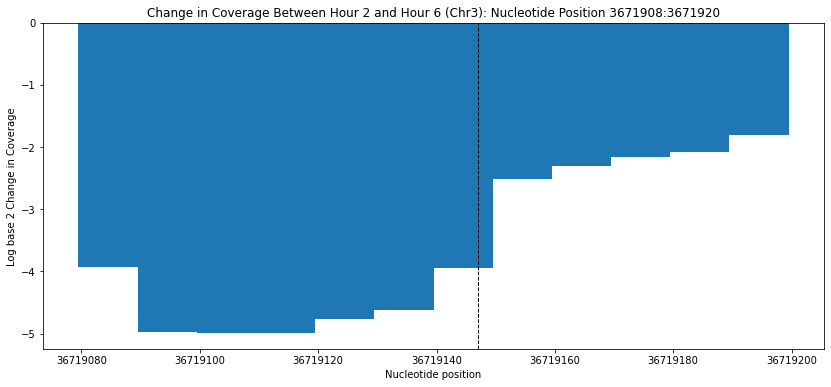

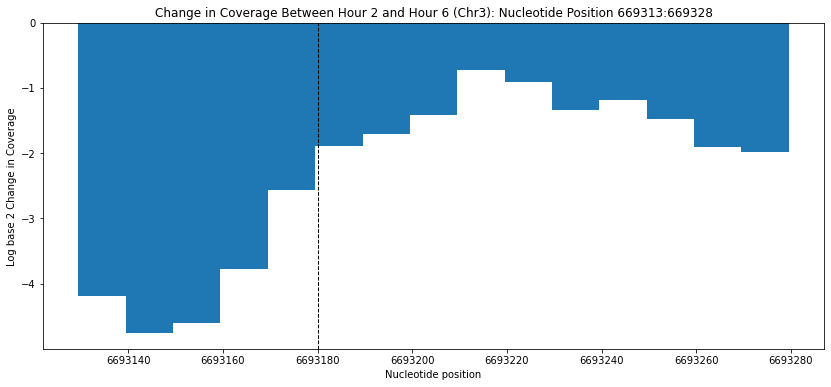

In [17]:
# For each statistic in our top 10 results, produce log2 change in coverage graphs
for start,end,pos in zip(df_mag_five['Start'],df_mag_five['End'], df_mag_five['Pos']):
    start = int(start)
    end = int(end)
    fig,ax = plt.subplots(figsize=(14, 6))
    val1 = start//10
    val2 = end//10
    
    # Use smoothed dataframe to graph
    chr1_graph2 = plt.bar(df_slide['ID'].iloc[val1:val2], df_slide['log2Diff_6_minus_2'].iloc[val1:val2], width = 10)
    ax.ticklabel_format(style = 'plain', axis='x', useOffset = False)
    
    # Add vertical line at position of "step"
    plt.axvline(x=pos, color='k', linestyle='--', linewidth=1)

    plt.xlabel('Nucleotide position')
    plt.ylabel('Log base 2 Change in Coverage')
    title = "Change in Coverage Between Hour 2 and Hour 6 (Chr3): Nucleotide Position " + str(val1)+":"+str(val2)
    plt.title(title)
    
    plt.savefig(f'Log2_graph_{val1}_{val2}.png')
    